In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\bank_dataset_cleaned.csv",encoding='latin1')

In [4]:
df.shape

(41188, 17)

In [5]:
df.head()

,age,job,marital,education,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(2601)

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df_sample = df.sample(n=3000, random_state=42)
df_sample.to_csv("bank_dataset_3000.csv", index=False)

In [11]:
df_sample.shape

(3000, 17)

In [12]:
df_sample.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
df_sample['y'].value_counts()

y
no     2678
yes     322
Name: count, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_resampled).value_counts().to_dict())


NameError: name 'X_train_scaled' is not defined

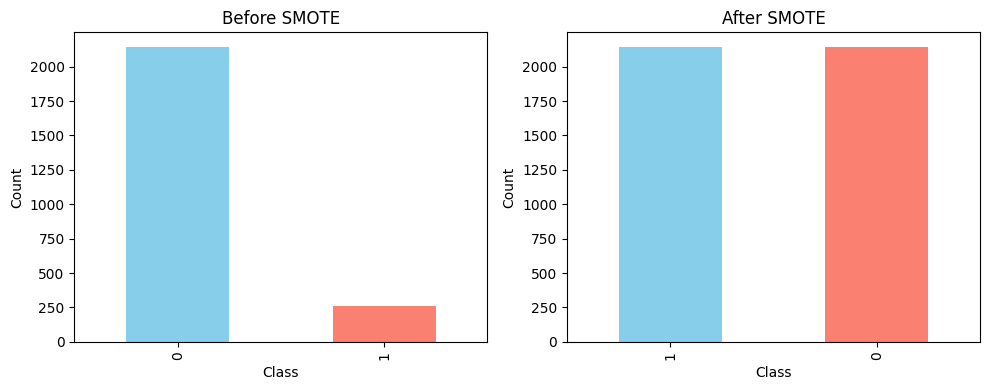

In [58]:
import matplotlib.pyplot as plt

before_counts = y_train.value_counts()
after_counts = pd.Series(y_resampled).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

before_counts.plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title("Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

after_counts.plot(kind='bar', ax=ax[1], color=['skyblue', 'salmon'])
ax[1].set_title("After SMOTE")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [80]:
numerical_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns
skew_values = df_sample[numerical_cols].skew()
print(skew_values)

age               0.681472
campaign          4.020674
pdays            -5.231249
previous          3.687893
emp.var.rate     -0.690906
cons.price.idx   -0.222539
cons.conf.idx     0.327002
euribor3m        -0.681384
nr.employed      -1.021848
dtype: float64


In [90]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_sample[['pdays', 'previous']] = pt.fit_transform(df_sample[['pdays', 'previous']])
skew_values = df_sample[numerical_cols].skew()
print(skew_values)

age               0.681472
campaign          0.243888
pdays            -5.231111
previous          2.128967
emp.var.rate     -0.690906
cons.price.idx   -0.222539
cons.conf.idx     0.327002
euribor3m        -0.681384
nr.employed      -0.602202
dtype: float64


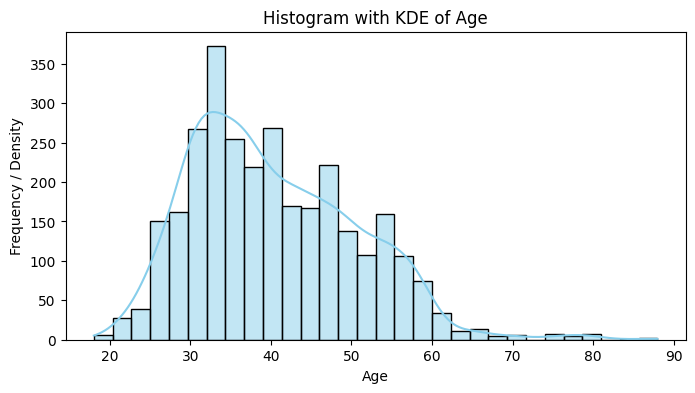

In [96]:
plt.figure(figsize=(8,4))
sns.histplot(df_sample['age'], bins=30, kde=True, color='skyblue')
plt.title('Histogram with KDE of Age')
plt.xlabel('Age')
plt.ylabel('Frequency / Density')
plt.show()

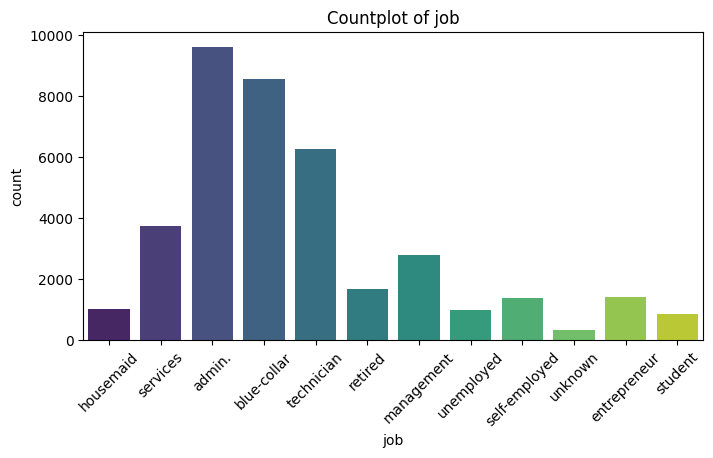

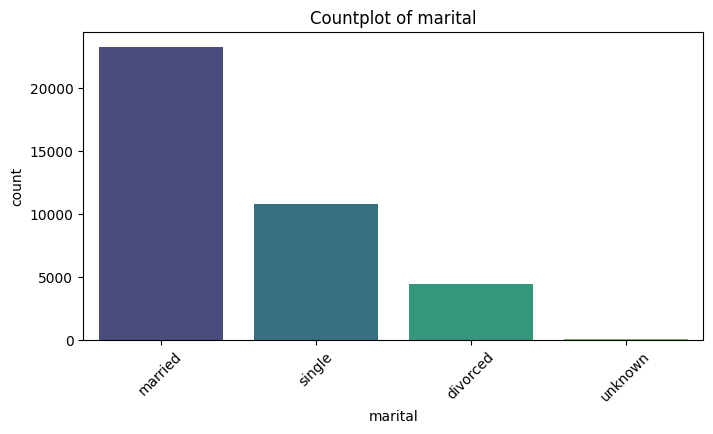

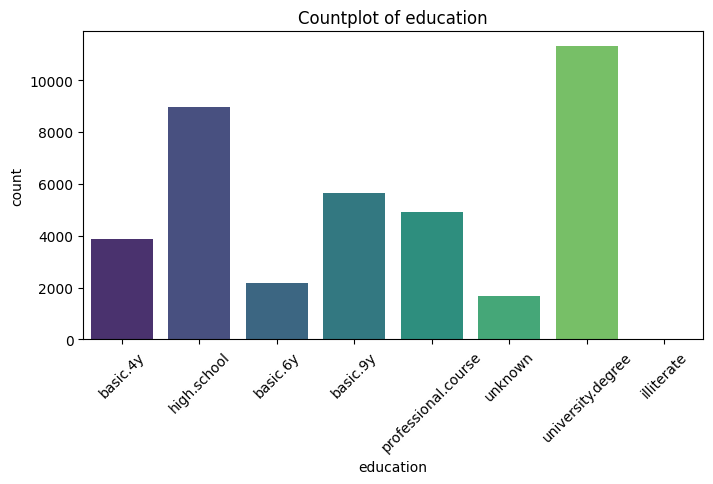

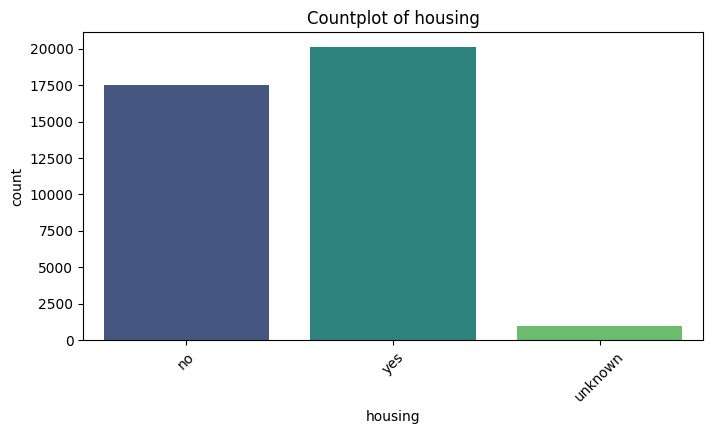

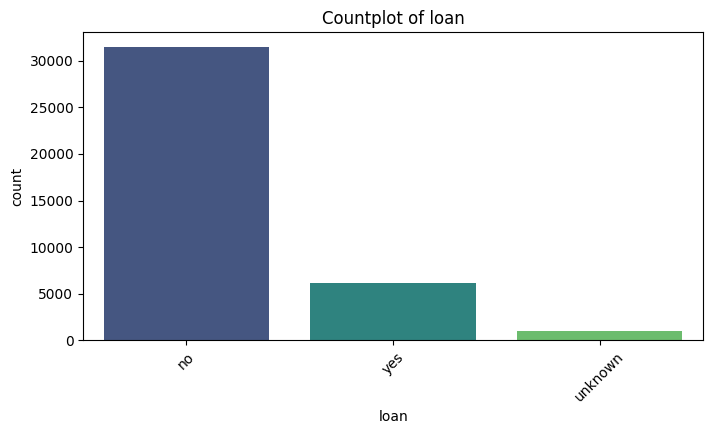

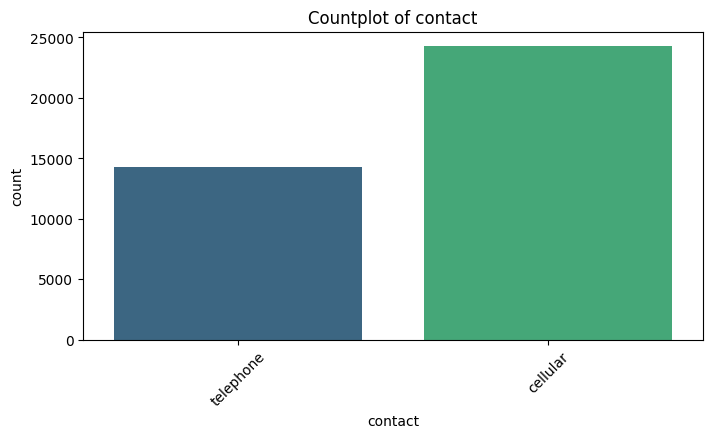

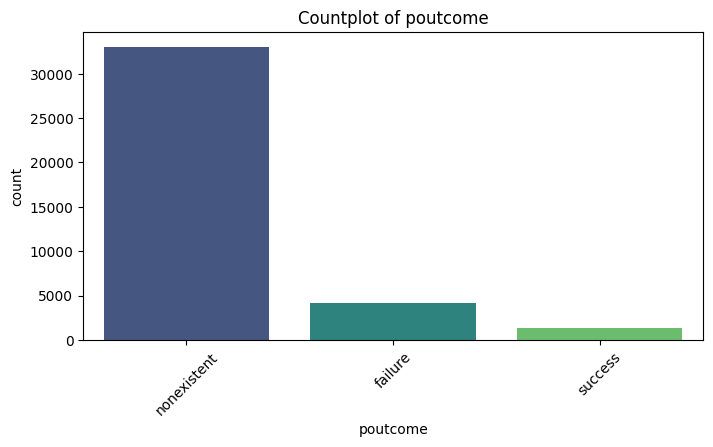

In [99]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue=col, palette='viridis', dodge=False)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [88]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38587.000000,38587.000000,38587.000000,38587.000000,38587.000000,38587.000000,38587.000000,38587.000000,38587.000000
mean,40.159354,2.639049,960.039288,0.182341,0.043289,93.573317,-40.551393,3.578392,5165.204647
std,10.505119,2.837304,192.797676,0.507678,1.583147,0.586900,4.655896,1.749072,73.179523
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [89]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

X = df_sample.drop(columns=['y'])
y = df_sample['y'].map({"yes": 1, "no": 0})

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", categorical_cols)

encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
X_encoded = encoder.fit_transform(X[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)

X_processed = pd.concat([
    X.drop(columns=categorical_cols).reset_index(drop=True),
    pd.DataFrame(X_encoded, columns=encoded_cols)
], axis=1)

print("Shape after encoding:", X_processed.shape)


Categorical columns: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']
Shape after encoding: (3000, 36)


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3), 
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid") 
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.4),  
    Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6683 - loss: 0.7126 - val_accuracy: 0.8933 - val_loss: 0.5085
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8788 - loss: 0.4884 - val_accuracy: 0.8933 - val_loss: 0.4326
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8913 - loss: 0.4456 - val_accuracy: 0.8950 - val_loss: 0.4045
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8913 - loss: 0.4249 - val_accuracy: 0.8950 - val_loss: 0.3936
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8933 - loss: 0.4124 - val_accuracy: 0.9000 - val_loss: 0.3872
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8913 - loss: 0.4042 - val_accuracy: 0.9017 - val_loss: 0.3833
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8988 - loss: 0.3965 - val_accuracy: 0.9017 - val_loss: 0.3801
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9008 - loss: 0.3876 - val_accuracy: 0.9033 - val_loss

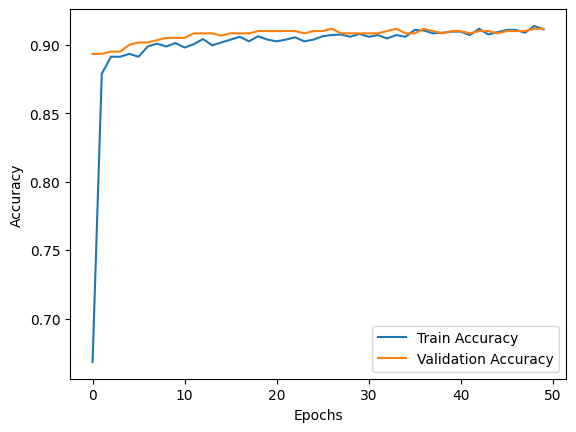

In [72]:

import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype("int32")

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.9116666666666666
F1 Score: 0.4044943820224719
Recall: 0.28125
Confusion Matrix:
 [[529   7]
 [ 46  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       536
           1       0.72      0.28      0.40        64

    accuracy                           0.91       600
   macro avg       0.82      0.63      0.68       600
weighted avg       0.90      0.91      0.89       600



In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    "hidden_layer_sizes": [(64, 32), (32, 16, 8)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "sgd"],
    "learning_rate_init": [0.001, 0.01],
    "max_iter": [300, 500]
}

mlp = MLPClassifier(random_state=42)

grid = GridSearchCV(mlp, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 300, 'solver': 'sgd'}
Best CV Accuracy: 0.9029166666666667
Test Accuracy: 0.905
